In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import time

In [82]:
def get_noise(batch_size, n_noise):
    return np.random.uniform(-1, 1, (batch_size, n_noise))

In [3]:
n_noise = 100
n_channel = 1
batch_size = 100

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))
    ])

In [5]:
train_data = datasets.MNIST(root='../../datasets/MNIST', split='train', download=True, transform=transform)
test_data = datasets.MNIST(root='../../datasets/MNIST', split='test', download=True, transform=transform)

# train_data.train_data = train_data.train_data.float() / 255
# test_data.test_data = test_data.test_data.float() / 255

In [6]:
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle=False)

In [7]:
class Generator(nn.Module):
    
    def __init__(self):
        super(Generator, self).__init__()
        
        # 1, 100
        self.fc1 = nn.Linear(n_noise, 128*7*7)
            
        self.conv = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 3, 2, 1, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            nn.ConvTranspose2d(64, 32, 3, 2, 1, output_padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
#             nn.ConvTranspose2d(32, 16, 3, 2, 1, output_padding=1),
#             nn.BatchNorm2d(16),
#             nn.ReLU(),
            
#             nn.ConvTranspose2d(16, 8, 3, 2, 1, output_padding=1),
#             nn.BatchNorm2d(8),
#             nn.ReLU(),
            
            nn.ConvTranspose2d(32, n_channel, 3, 1, 1)
        )
        
    def forward(self, x):
        x = self.fc1(x)
        x = x.reshape(-1, 128, 7, 7)
        x = self.conv(x)
        return F.tanh(x)

In [8]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(n_channel, 16, 3, 1, 1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2,2),
            

            nn.Conv2d(128, 128, 3, 1, 1)       
        )
        
        self.fc1 = nn.Linear(128*7*7, 1)
        
    def forward(self, x):
        x = self.conv(x).reshape(-1, 128*7*7)
        x = self.fc1(x)
        
        return F.sigmoid(x)


In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

G = Generator()
D = Discriminator()

G = G.to(device)
D = D.to(device)

criterion = nn.BCELoss()
optimizerG = optim.Adam(G.parameters(), lr=0.0002)
optimizerD = optim.Adam(D.parameters(), lr=0.0002)

Training start


C:\Users\my\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\my\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 0 lossD tensor(0.0714, device='cuda:0') lossG tensor(6.4683, device='cuda:0')
epoch 1 lossD tensor(0.0526, device='cuda:0') lossG tensor(5.5584, device='cuda:0')
epoch 2 lossD tensor(0.3032, device='cuda:0') lossG tensor(2.9766, device='cuda:0')
epoch 3 lossD tensor(0.3131, device='cuda:0') lossG tensor(3.5955, device='cuda:0')
epoch 4 lossD tensor(0.3588, device='cuda:0') lossG tensor(5.3886, device='cuda:0')
epoch 5 lossD tensor(0.3113, device='cuda:0') lossG tensor(2.8942, device='cuda:0')
epoch 6 lossD tensor(0.2939, device='cuda:0') lossG tensor(4.4524, device='cuda:0')
epoch 7 lossD tensor(0.1308, device='cuda:0') lossG tensor(5.4825, device='cuda:0')
epoch 8 lossD tensor(0.1246, device='cuda:0') lossG tensor(4.4558, device='cuda:0')
epoch 9 lossD tensor(0.1949, device='cuda:0') lossG tensor(4.8515, device='cuda:0')
epoch 10 lossD tensor(0.7061, device='cuda:0') lossG tensor(6.8375, device='cuda:0')
epoch 11 lossD tensor(0.1853, device='cuda:0') lossG tensor(5.7966, device=

C:\Users\my\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


epoch 21 lossD tensor(0.0552, device='cuda:0') lossG tensor(9.5623, device='cuda:0')
epoch 22 lossD tensor(0.4529, device='cuda:0') lossG tensor(4.9745, device='cuda:0')
epoch 23 lossD tensor(0.0488, device='cuda:0') lossG tensor(6.8248, device='cuda:0')
epoch 24 lossD tensor(0.0496, device='cuda:0') lossG tensor(5.8086, device='cuda:0')
epoch 25 lossD tensor(0.0912, device='cuda:0') lossG tensor(8.1112, device='cuda:0')
epoch 26 lossD tensor(0.0447, device='cuda:0') lossG tensor(5.9381, device='cuda:0')
epoch 27 lossD tensor(0.0708, device='cuda:0') lossG tensor(5.3330, device='cuda:0')
epoch 28 lossD tensor(0.0490, device='cuda:0') lossG tensor(6.5138, device='cuda:0')
epoch 29 lossD tensor(0.0842, device='cuda:0') lossG tensor(4.7656, device='cuda:0')
epoch 30 lossD tensor(0.1705, device='cuda:0') lossG tensor(6.0767, device='cuda:0')
epoch 31 lossD tensor(0.0960, device='cuda:0') lossG tensor(5.6823, device='cuda:0')
epoch 32 lossD tensor(0.0540, device='cuda:0') lossG tensor(7.864

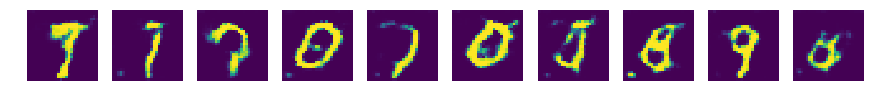

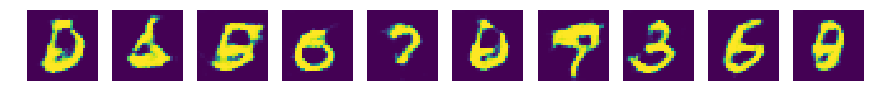

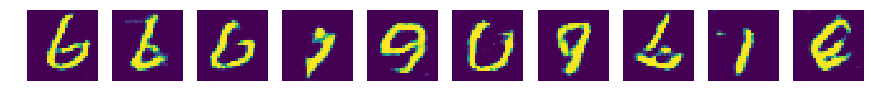

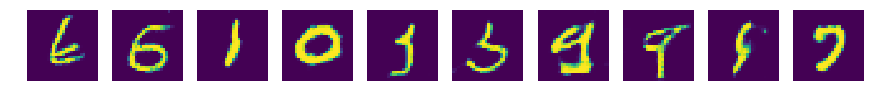

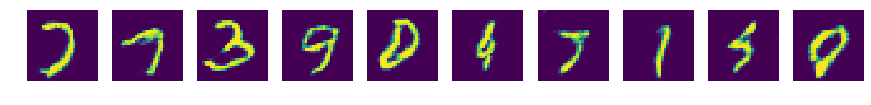

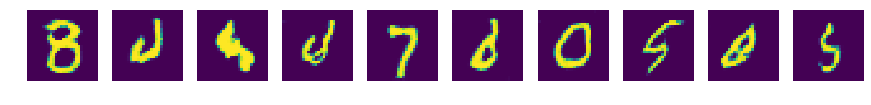

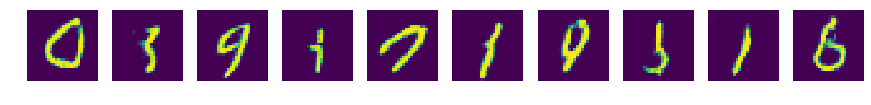

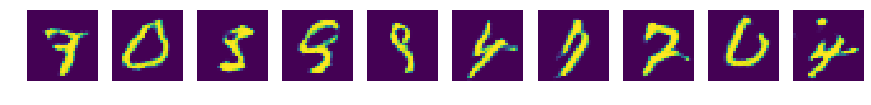

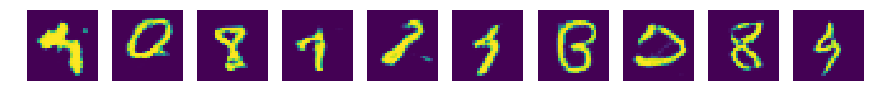

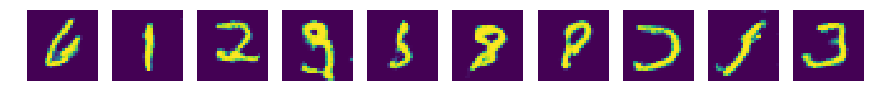

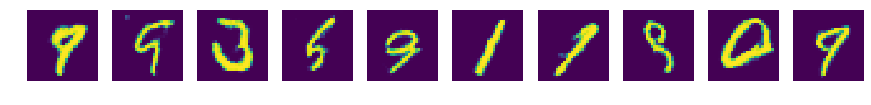

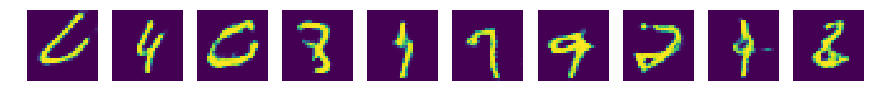

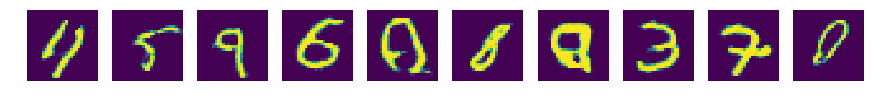

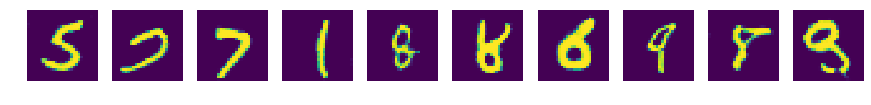

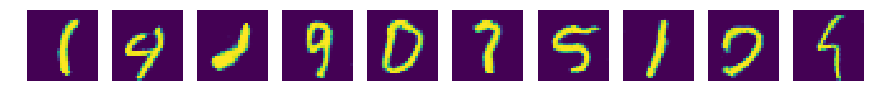

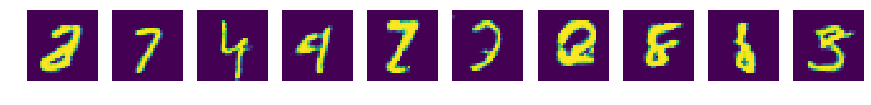

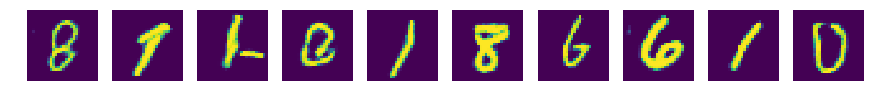

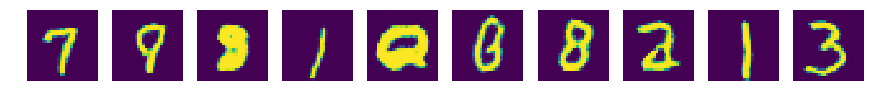

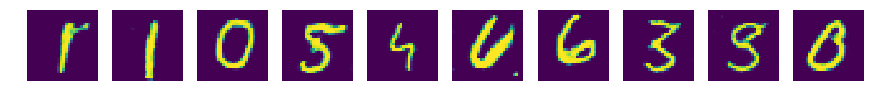

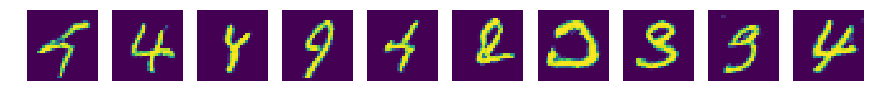

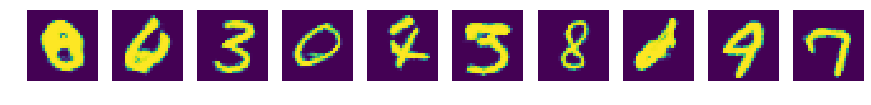

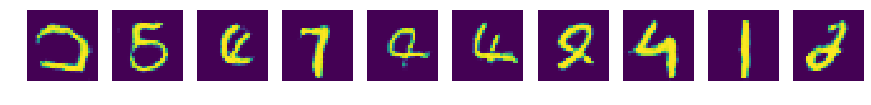

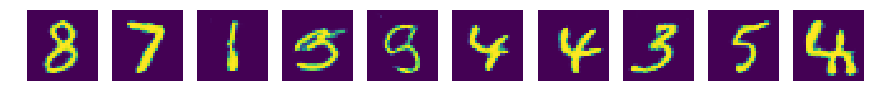

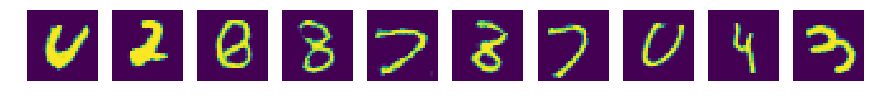

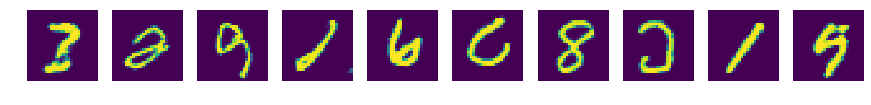

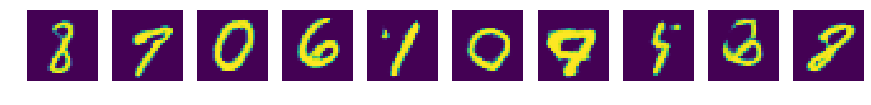

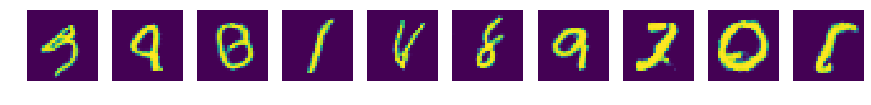

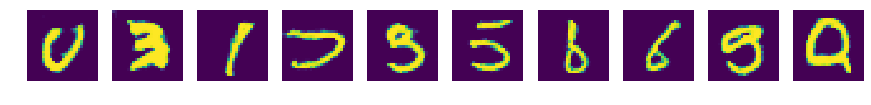

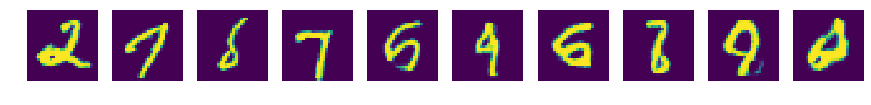

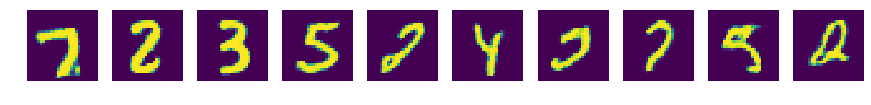

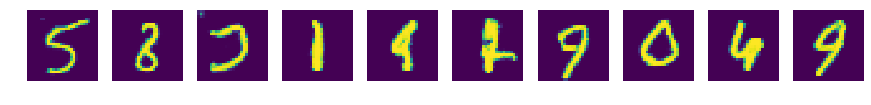

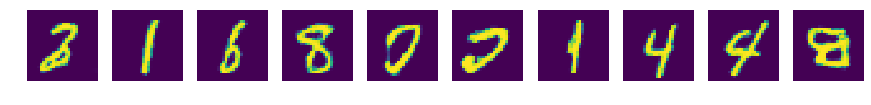

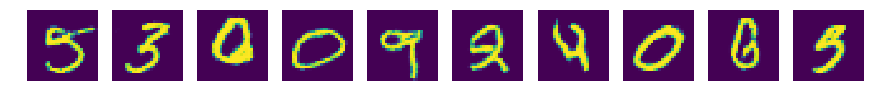

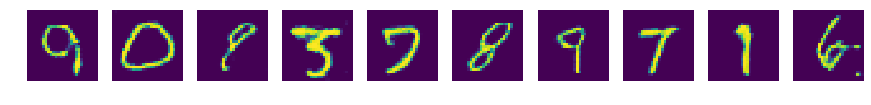

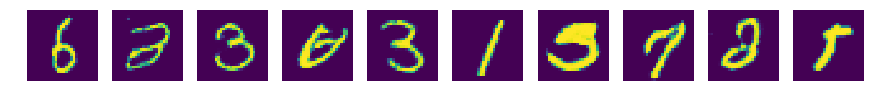

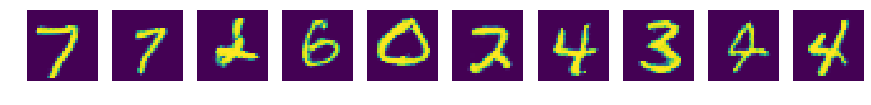

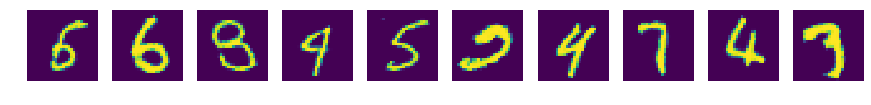

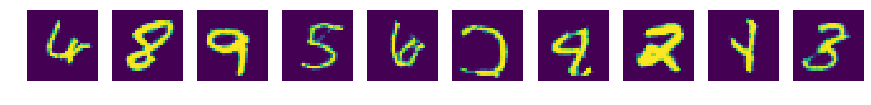

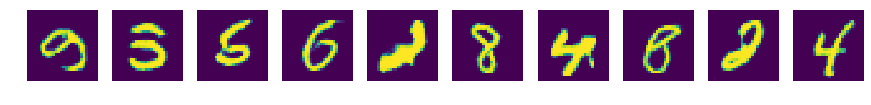

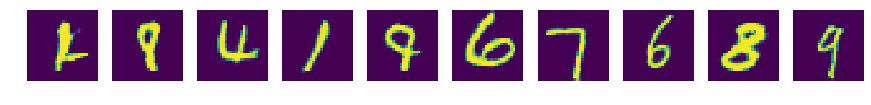

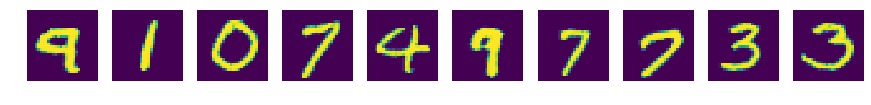

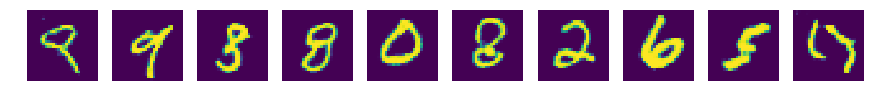

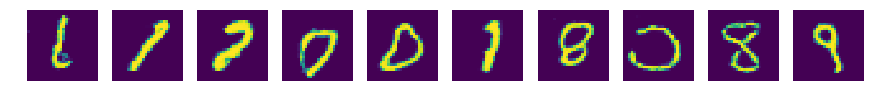

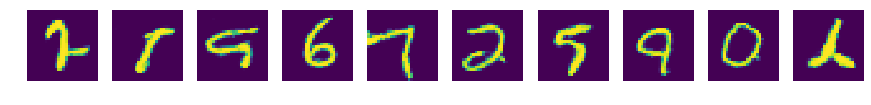

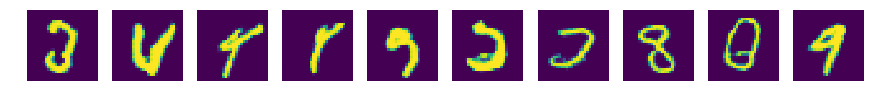

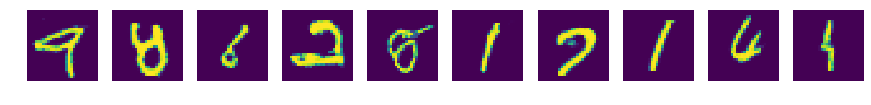

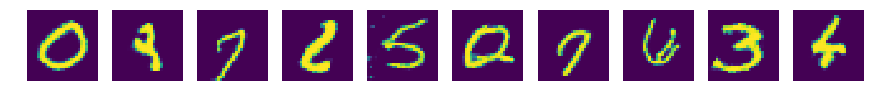

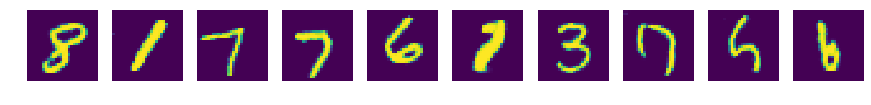

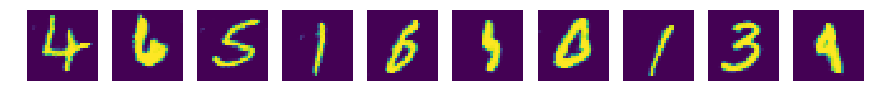

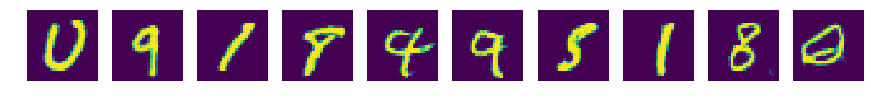

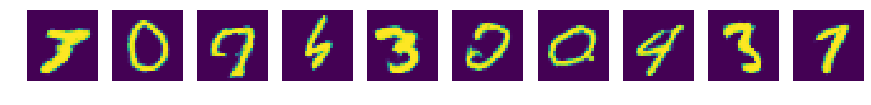

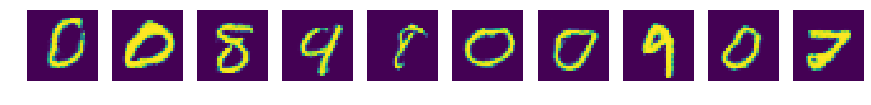

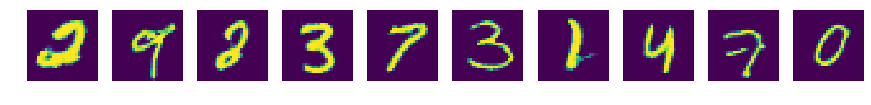

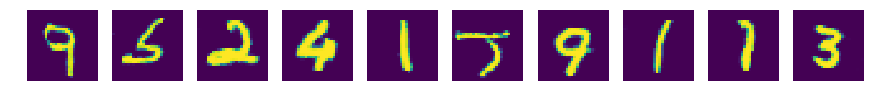

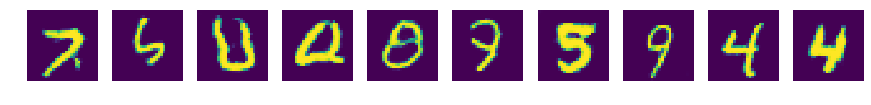

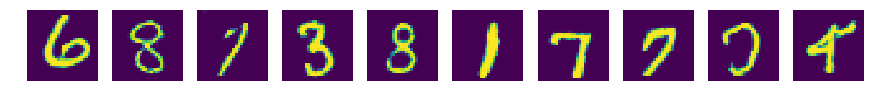

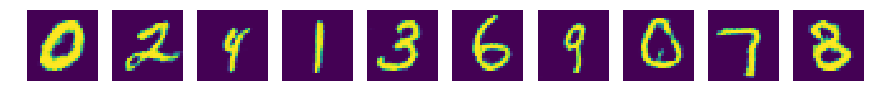

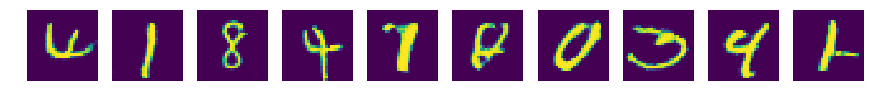

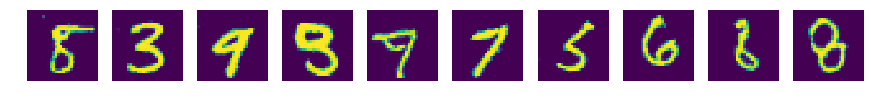

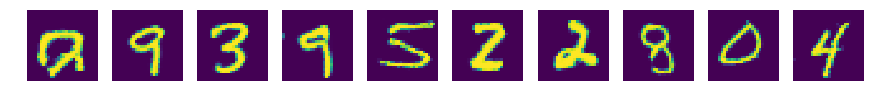

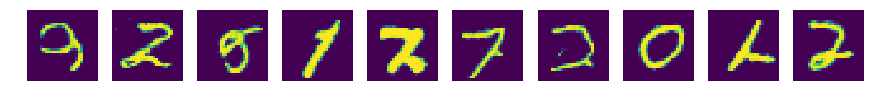

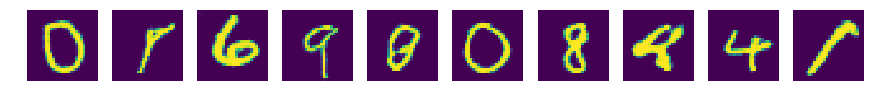

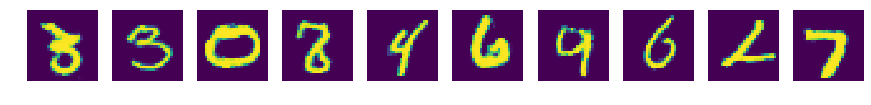

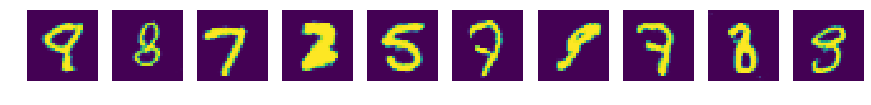

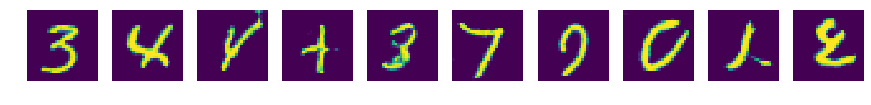

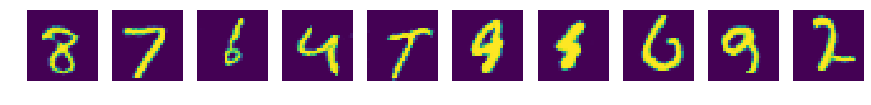

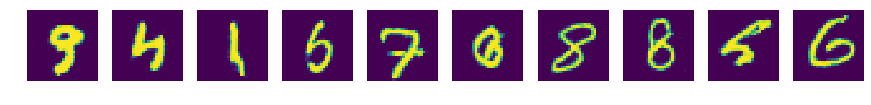

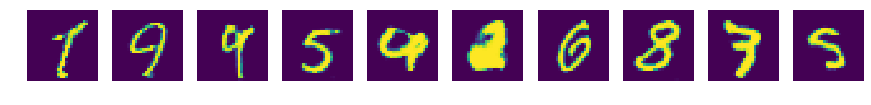

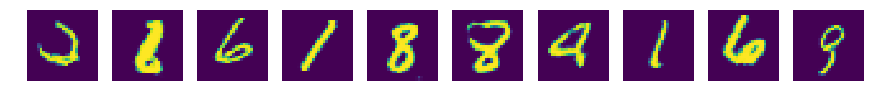

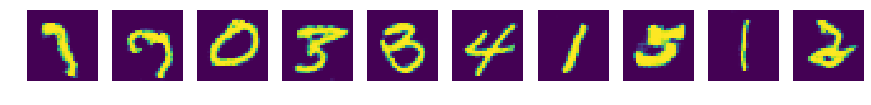

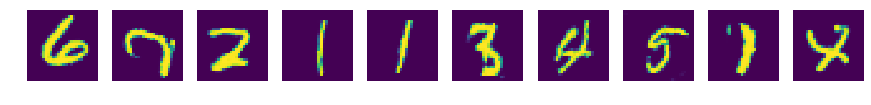

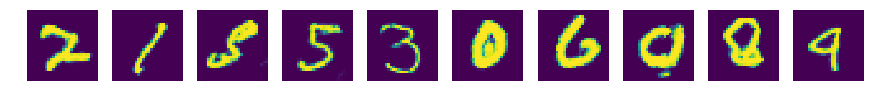

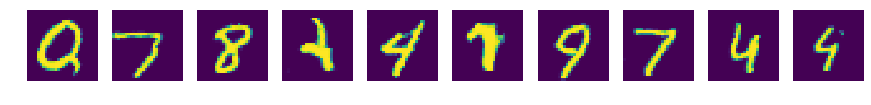

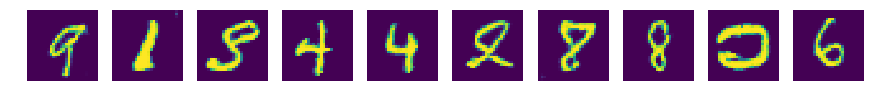

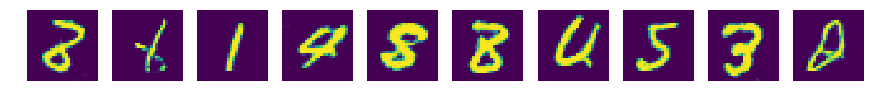

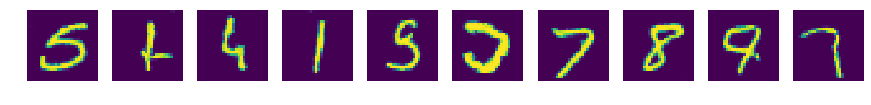

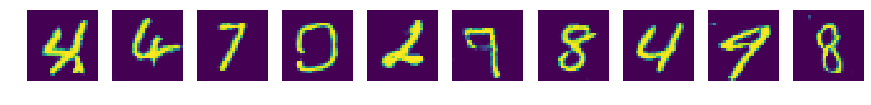

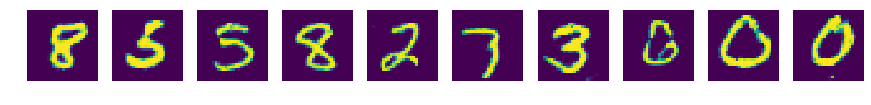

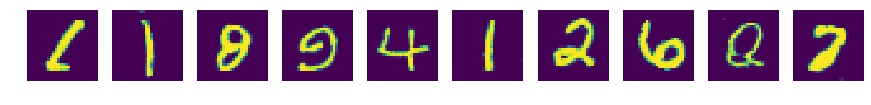

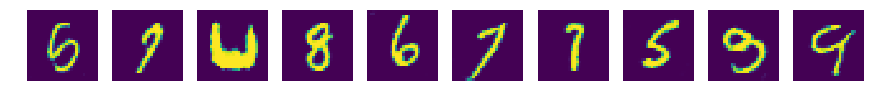

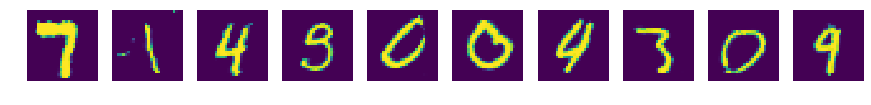

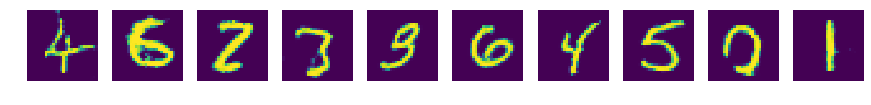

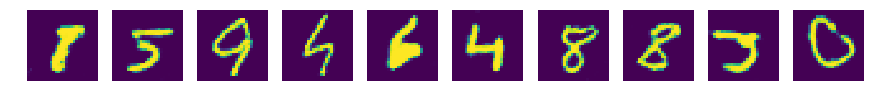

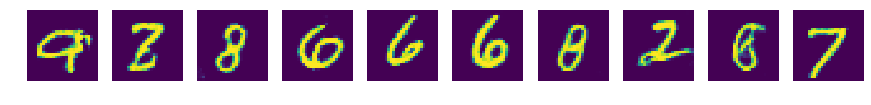

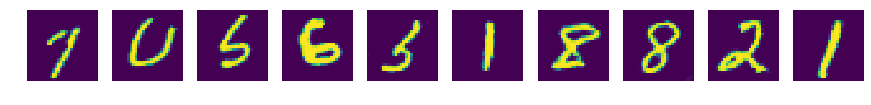

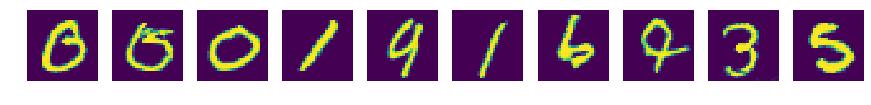

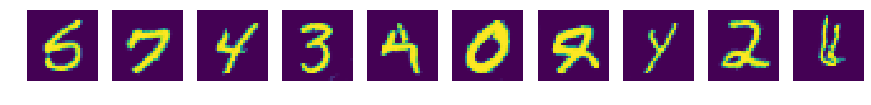

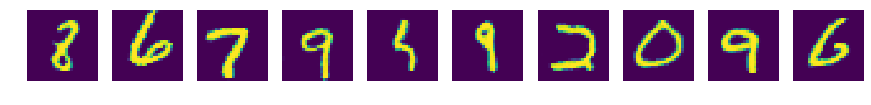

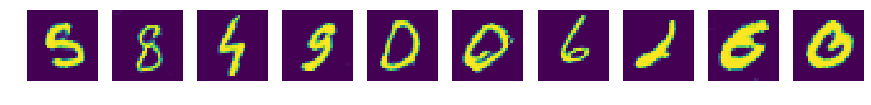

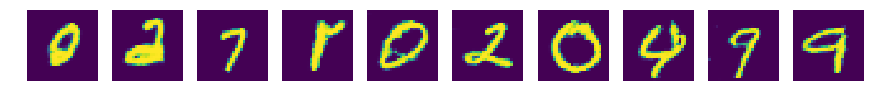

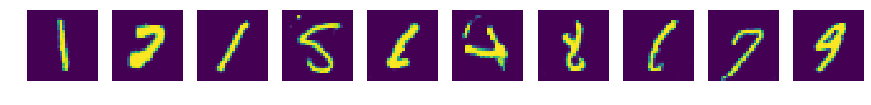

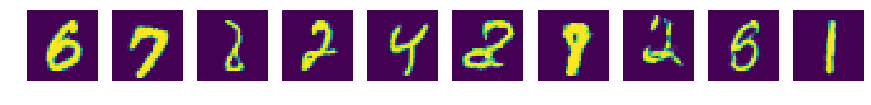

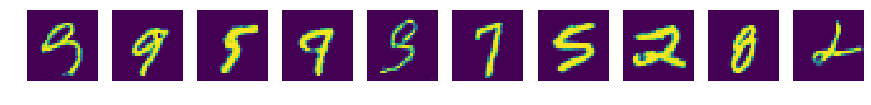

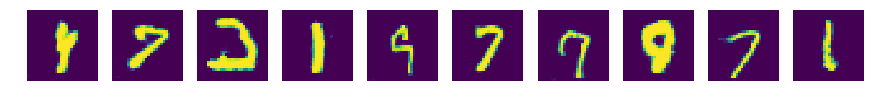

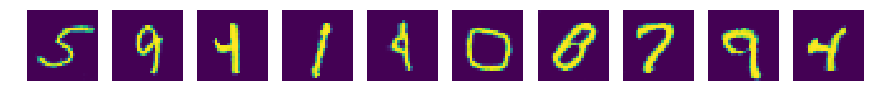

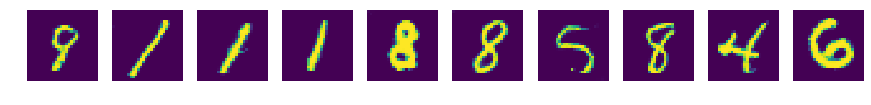

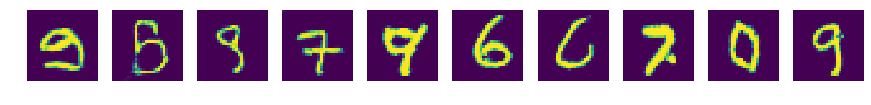

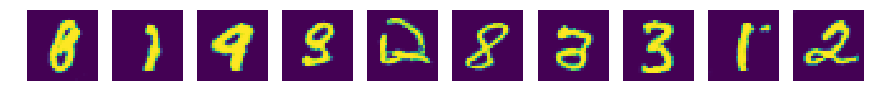

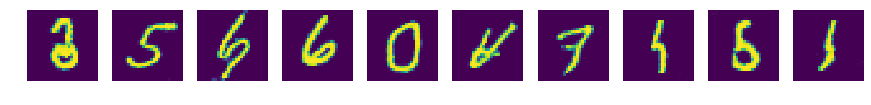

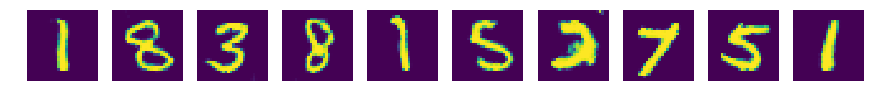

In [10]:
print("Training start")
start = time.time()

for epoch in range(100):
    for data, target in train_loader:
        G.train()
        train_x, train_y = data.reshape(-1, 1, 28, 28).to(device), data.to(device)
        
        #training Discriminator
        optimizerD.zero_grad()
        d_real_data = train_x.to(device)
        d_real_output = D(d_real_data)
        d_real_error = criterion(d_real_output, torch.ones(batch_size).reshape(batch_size,1).to(device))
        
        d_gen_input = torch.from_numpy(get_noise(batch_size, n_noise)).float().to(device)
        d_fake_data = G(d_gen_input.float()).detach()
        d_fake_output = D(d_fake_data)
        d_fake_error = criterion(d_fake_output, torch.zeros(batch_size).reshape(batch_size,1).to(device))

        d_train_loss = d_real_error + d_fake_error
        d_train_loss.backward()
        optimizerD.step()
        
        
        #training Generator
        optimizerG.zero_grad()
#         g_data = torch.from_numpy(get_noise(batch_size, n_noise)).float().to(device)
        g_fake_output = G(d_gen_input)
        gd_fake_output = D(g_fake_output)
        g_error = criterion(gd_fake_output, torch.ones(batch_size).reshape(batch_size,1).to(device))
        g_error.backward()
        
        optimizerG.step()
    
    
        lossD = d_train_loss
        lossG = g_error
    G.eval()
    print('epoch %d'%epoch, 'lossD',lossD.data,'lossG',lossG.data)
    image = G(torch.from_numpy(get_noise(10, n_noise)).to(device).float())
    fig, ax = plt.subplots(1, 10, figsize=(15,4))
    for i in range(10):
        ax[i].set_axis_off()
        ax[i].imshow(image[i].cpu().data.numpy().reshape(28, 28))
    plt.savefig('./DCGAN_pytorch_MNIST_samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
    plt.close()
        
end = time.time()

print('Elapsed Time : %.3f sec'%(end-start))